In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers

planarity_crit = pc.PlanarityCriterion()
solver_CNF = pc.CNF2Solver()
printer = printers.Printer()

Seed:  1966


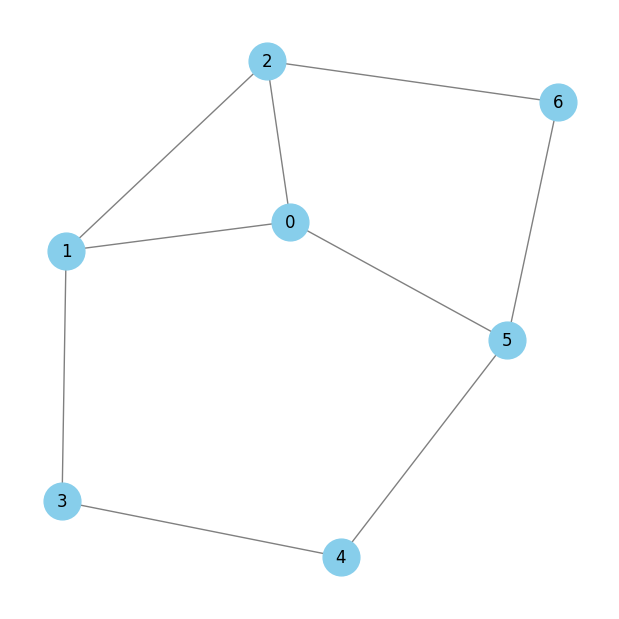

In [2]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = 1966#random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 7 # Number of nodes
p = 0.35 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [3]:
### CREATE SPANNING TREE ###
spanning_tree = planarity_crit.spanning_tree(G)
print(spanning_tree.edges)

[(4, 3), (3, 1), (1, 0), (0, 2), (2, 6), (6, 5)]


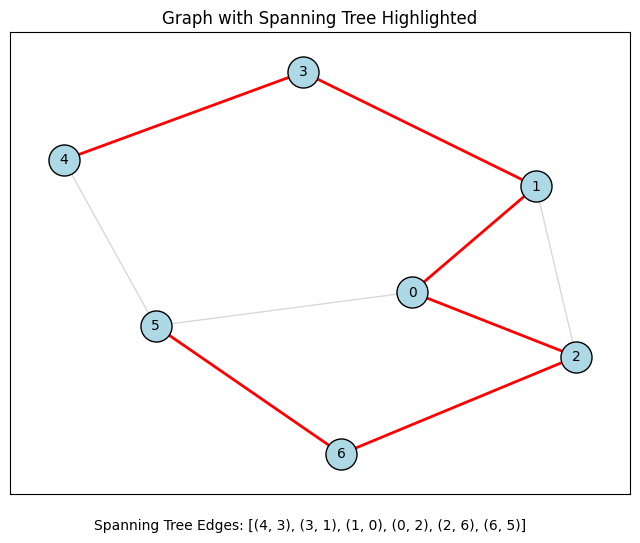

In [4]:
### PRINT SPANNING TREE ### 
printer.print_spanning_tree(G, spanning_tree)

In [5]:
### GENERATE SET OF FUNDAMENTAL CYCLES ### 

fundamental_cycles = planarity_crit.fundamental_cycles(G, spanning_tree)
print(fundamental_cycles) ### TODO VER SI SE PUEDE HACER TAMBIÉN CON LA LIBRERÍA DE NETWORKX

[[0, 2, 6, 5, 0], [1, 0, 2, 1], [4, 3, 1, 0, 2, 6, 5, 4]]


In [6]:
### GET BRIDGES OF EACH CYCLE ###

bridges_all_cycles = planarity_crit.get_bridges(G, fundamental_cycles)
print(bridges_all_cycles) ### TODO QUITAR ESTO

---GETTING BRIDGES---
cycle [0, 2, 6, 5, 0]
0 edges:  [(0, 1)]
att_edge: (0, 1)
2 edges:  [(2, 1)]
att_edge: (2, 1)
6 edges:  []
5 edges:  [(5, 4)]
att_edge: (5, 4)
---GETTING BRIDGES---
cycle [1, 0, 2, 1]
1 edges:  [(1, 3)]
att_edge: (1, 3)
0 edges:  [(0, 5)]
att_edge: (0, 5)
2 edges:  [(2, 6)]
att_edge: (2, 6)
---GETTING BRIDGES---
cycle [4, 3, 1, 0, 2, 6, 5, 4]
4 edges:  []
3 edges:  []
1 edges:  [(1, 2)]
att_edge: (1, 2)
[]
True (2, True)
0 edges:  [(0, 5)]
att_edge: (0, 5)
[(1, 2)]
True (5, True)
2 edges:  [(2, 1)]
att_edge: (2, 1)
6 edges:  []
5 edges:  [(5, 0)]
att_edge: (5, 0)
{(0, 2, 6, 5, 0): [{'edges': [(1, 3), (3, 4), (0, 1), (2, 1), (5, 4)], 'att_ver': {0, 2, 5}}], (1, 0, 2, 1): [{'edges': [(3, 4), (4, 5), (5, 6), (1, 3), (0, 5), (2, 6)], 'att_ver': {0, 1, 2}}], (4, 3, 1, 0, 2, 6, 5, 4): [{'edges': [(1, 2)], 'att_ver': {1, 2}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}]}


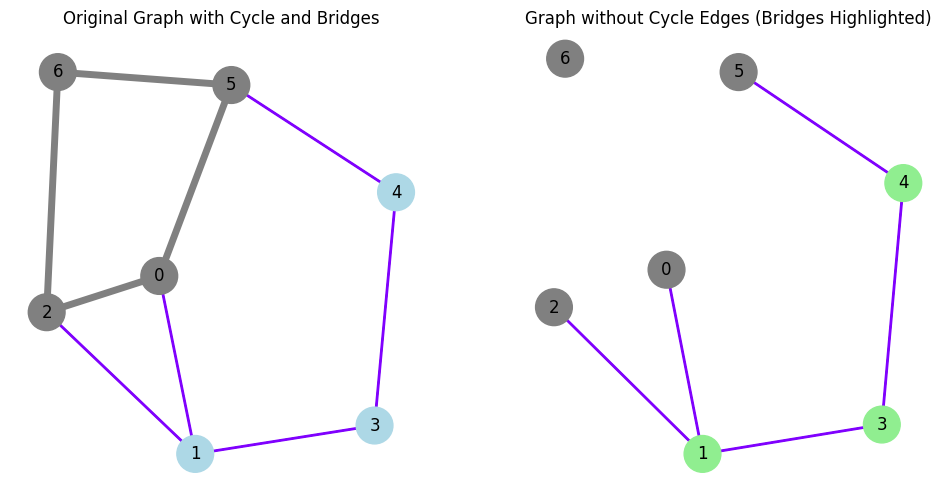

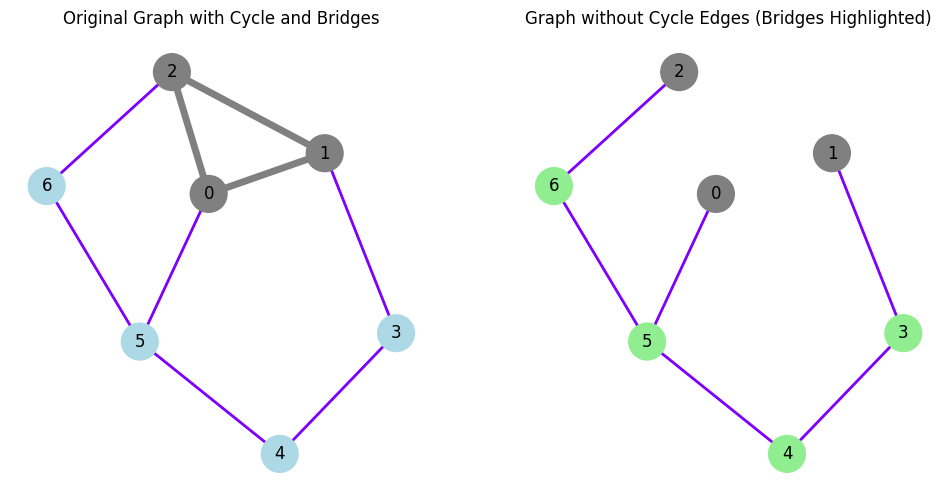

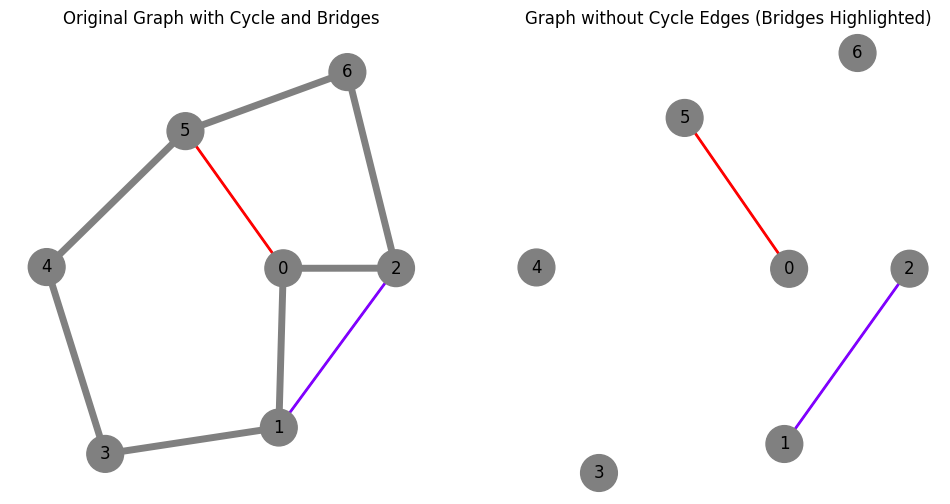

In [7]:
### PRINT BRIDGES OF EACH CYCLE ### TODO

printer.print_bridges(G, bridges_all_cycles)

In [8]:
### GET CNF LISTS ###

CNF_lists = planarity_crit.get_2_CNF(G, fundamental_cycles, bridges_all_cycles)

In [9]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)


LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)

Cycle 0 (Nodes: [0, 2, 6, 5, 0]):
  Edge 0: (0, 1)
    PP_c,e (Positive-Positive): {((3, 4), 0), ((5, 4), 0), ((2, 1), 0), ((1, 3), 0)}
    PN_c,e (Positive-Negative): {((2, 6), 1), ((0, 5), 2), ((0, 5), 1), ((5, 6), 1)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((3, 4), 0), ((5, 4), 0), ((2, 1), 0), ((1, 3), 0)}
  Edge 3: (1, 2)
    PP_c,e (Positive-Positive): {((3, 4), 0), ((5, 4), 0), ((0, 1), 0), ((1, 3), 0)}
    PN_c,e (Positive-Negative): {((2, 6), 1), ((0, 5), 1), ((5, 6), 1)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((3, 4), 0), ((5, 4), 0), ((0, 1), 0), ((1, 3), 0)}
  Edge 4: (1, 3)
    PP_c,e (Positive-Positive): {((3, 4), 0), ((5, 4), 0), ((2, 1), 0), ((0, 1), 0)}
    PN_c,e (Positive-Negative): {((0, 5), 2)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((3, 4), 0), ((5, 4), 0), ((2, 1), 0), ((0, 1), 0)}
  Ed

In [10]:
### COMPLETE CNF LISTS ### TODO

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

cycle_index_map = {}
for i, c in enumerate(fundamental_cycles):
    cycle_index_map[tuple(c)] = i

CNF_lists = solver_CNF.update_CNF_iterative(
    CNF_lists, G, fundamental_cycles, edge_index_map, cycle_index_map
)

In [11]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)


LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)

Cycle 0 (Nodes: [0, 2, 6, 5, 0]):
  Edge 0: (0, 1)
    PP_c,e (Positive-Positive): {((1, 3), 0), ((0, 1), 0), ((3, 4), 0), ((2, 1), 0), ((5, 4), 0)}
    PN_c,e (Positive-Negative): {((3, 4), 1), ((2, 6), 1), ((4, 5), 1), ((0, 5), 2), ((0, 5), 1), ((1, 2), 2), ((5, 6), 1), ((1, 3), 1)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((1, 3), 0), ((0, 1), 0), ((3, 4), 0), ((2, 1), 0), ((5, 4), 0)}
  Edge 3: (1, 2)
    PP_c,e (Positive-Positive): {((1, 3), 0), ((0, 1), 0), ((3, 4), 0), ((2, 1), 0), ((5, 4), 0)}
    PN_c,e (Positive-Negative): {((3, 4), 1), ((2, 6), 1), ((4, 5), 1), ((0, 5), 2), ((0, 5), 1), ((1, 2), 2), ((5, 6), 1), ((1, 3), 1)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((1, 3), 0), ((0, 1), 0), ((3, 4), 0), ((2, 1), 0), ((5, 4), 0)}
  Edge 4: (1, 3)
    PP_c,e (Positive-Positive): {((1, 3), 0), ((0, 1), 0), ((3, 4), 0), ((2, 1), 0), ((5,

In [12]:
### GET PSEUDOEMBEDDING ###

In [13]:
### GET NEW PERIPHERAL CYCLE BASIS ###

In [14]:
### GET PLANE MESH AND CHECK PLANARITY ###